# **<u>Final Project</u>**

## **Section 1: Introduction and Problem Statement**

### **1.1 Overview**

This project explores a supervised machine learning approach for predicting a song's popularity score based on a variety of audio and musical features. Because song popularity is measured as a continuous variable ranging from 0 to 100, the problem will be framed as a regression task. The "_Spotify Tracks Dataset_" from Kaggle includes attributes such as danceability, energy, loudness, tempo, valence, acousticness, and other engineered audio features that collectively characterize a song's composition and listener appeal.

This analysis builds on _Cognify_, a mood-based music recommendation project I originally developed for a Data Mining course. Cognify explored patterns in musical features and examined how songs relate to one another within a seed playlist to generate song recommendations. In this final project, the foundation for Cognify is extended by applying supervised learning methods to predict a song's popularity using the _Spotify Tracks Dataset_.

### **1.2 Problem Statement**

Below, we investigate whether a song's popularity can be accurately predicted using measurable audio features. The _Spotify Tracks Dataset_ contains track-level attributes (danceability, energy, loudness, acousticness, valence, speechiness, and tempo). Each feature measures a specific musical and acoustic characteristic. The target variable is a continuous popularity score ranging from 0 to 100, framing this as a supervised regression prolem.

Predicting the poularity of a song is incredibly useful for music-streaming platforms and artists seeking to understand which musical elements contribute most to listener engagement. Because popularity may depend on complex and potentially linear relationships among many audio features, machine learning provides an effective approach for building a predictive model and analyzing how features influence one another.

### **1.3 Dataset Description**

"_Spotify Tracks Dataset_" is public dataset sourced from Kaggle and contains track-level information for thousands of songs. The original data is from the _Spotify_ music-streaming platform; however, there is a limitation (of 50 songs at time) in the number of songs that can be "pulled" through their API. This dataset will serve as a substitute for the data that would be provided via the _Spotify_ web APIs.

All audio features in this dataset are numeric and can be used for regression. Each row of this dataset represents a single song, with columns including attributes such as danceability, energy, loudness, etc. The target variable for this project will be **popularity**, a continuous score between 0 and 100 reflecting how widely the track is streamed.

### **1.4 Project Goals**

This project aims to achieve the following goals:

1. Perform comprehensive exploratory analysis (EDA) to characterize the dataset and assess features distribution, correlations, and potential preprocessing needs.
2. Investigate how individual audio features relate to the target variable, **popularity**, and identify meaningful patterns or dependencies.
3. Develop a suite of regression models (_including Linear, k-Nearest Neighbors and Decision Tree Regressions_) to evaluate different supervised learning approaches.
4. Asses model performance using appropriate evaluation metrics and compare model stregths, weaknesses, and generalization ability.
5. Determine which audio features have the greatest influence on popularity predicitions, providing insight into the factors that drive listener engagement.

## **Section 2: Project Set-up**

### **2.1 Import Libraries**

These libraries support the machine workflow for this project: data loading, cleaning, EDA, visualization, model development, and evaluation. _Scikit-learn_ tools reviewed during lecture and applied in the assessments for this course for model training, hyperparameter tuninig, preprocessing, and computing regression metrics _(RMSE, MAE, and R-squared)_.

The following libraries will be used throughout the project to support the Project Goals listed in Section 1.4.

In [106]:

#Libraries used for core data handling.
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Debugging and stylization
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


### **2.2 Load Dataset**

The first step in this analysis is to load the _Spotify Tracks Dataset_ sourced from _Kaggle_ into the dataframe via pandas. Doing so allows for efficient inspection, cleaning, and manipulation of the data structure. Viewing the first few rows helps verify the correct data was imported as expected, and provides an initial understanding of the features provided in the dataset.

In [107]:
df = pd.read_csv("SpotifyTracksDataset.Popular.csv", encoding='cp1252')

df.head()

,genre,artist_name,track_name,track_id,popularity,seed_key,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Children's Music,Neva Eder,Pat-a-cake,3WD0pKwRzP3cIlLu5upr0n,0,70856,0.509,0.766,15387,0.5380,0.000001,-1,0.131,-15.830,1,0.8800,92.912,0.00,0.000
1,Classical,George Frideric Handel,"Rinaldo, HWV 7a, Act I (Ed. G. Sechi): Questi ...",6TLQnTsEA4dC2tnrw90oXj,0,92679,0.969,0.562,15509,0.1250,0.001380,2,0.373,-15.449,2,0.2010,115.827,5.00,0.574
2,Classical,Johann Sebastian Bach,"St. John Passion, BWV 245, Pt. 2: No. 25c, Pil...",59WZFyp8hKSPBCc9rG8Ooa,0,85280,0.914,0.588,16316,0.1650,0.000000,4,0.233,-26.286,1,0.2370,104.678,1.00,0.000
3,Rock,Solange,S McGregor (interlude),6vOnTS8EhcUqvaRwsV2Dfn,18,71033,0.922,0.422,16640,0.3210,0.000003,3,0.179,-15.381,1,0.3040,176.961,5.00,0.361
4,Classical,Johann Sebastian Bach,"St. John Passion, BWV 245, Pt. 2: No. 21a, Und...",1biRN2dfC79PH6p5ckUfTX,0,85373,0.954,0.532,16748,0.0639,0.000000,-6,0.593,-25.800,1,0.0519,126.447,0.25,0.000


## **Section 3: Exploratory Data Analysis (EDA)**

### **3.1 Dataset Checks**

**3.1.1 Dataset Structure and Dimensions**

The overall size and layout of the dataset were examined:

- _**df.shape**_ reports the number of observations and features, giving a high-level sense of the dataset and complexity.
- _**df.columns**_ provides a list of attribute names, confirming the expected structure and confirming the names of each variable in the dataset.

In [143]:
df.shape

(176561, 19)

In [109]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'seed_key', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

**3.1.2 Assess for Missing Values**

This identifies the total number of missing entries per feature. Understanding the distribution of missing values is essential for determining feature removal or if additional data-cleaning strategies are necessary before completing additional analysis.

As mentioned above, this dataset was previously used in a Data Mining project. This missing values audit showed one missing value (_in track_name_), allowing the analysis to proceed without additional data cleanse.

In [73]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
seed_key            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

**3.1.3 Summary Statistics of Dataset**

A summary of the dataset's statistics provides insight into each numerical feature's central tendency, dispersion, and range. These statitics help identify potential outliers, irregular distributions, scale differences that may require normalization or standardization, and is an early indication of how features may related to the target variable (_**popularity**_).

The summary below indicates that many features span wide ranges and exhibit substantial variability, suggestion the dataset captures diverse genres, production styles, and recording characteristics.

In [110]:
df.describe()

,popularity,seed_key,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,176561.000000,176561.000000,176561.000000,176561.000000,1.765610e+05,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000,176561.000000
mean,36.266922,88281.000000,0.404253,0.541062,2.361433e+05,0.556933,0.172155,1.426357,0.224581,-10.140612,1.340290,0.127441,117.198825,1.060938,0.451604
std,17.388435,50968.914777,0.366355,0.190422,1.305656e+05,0.275856,0.323000,4.328763,0.211093,6.397059,0.473808,0.204427,31.325765,0.642337,0.267837
min,0.000000,1.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,-7.000000,0.009670,-52.457000,1.000000,0.022200,30.379000,0.000000,0.000000
25%,25.000000,44141.000000,0.045600,0.415000,1.782420e+05,0.343000,0.000000,-3.000000,0.097500,-12.855000,1.000000,0.036800,92.005000,1.000000,0.222000
50%,37.000000,88281.000000,0.288000,0.558000,2.194660e+05,0.592000,0.000071,3.000000,0.130000,-8.195000,1.000000,0.049400,115.005000,1.000000,0.440000
75%,49.000000,132421.000000,0.791000,0.683000,2.685730e+05,0.789000,0.091100,5.000000,0.277000,-5.632000,2.000000,0.102000,138.791000,1.000000,0.667000
max,100.000000,176561.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,7.000000,1.000000,3.744000,2.000000,0.967000,242.903000,5.000000,1.000000


### **3.2 Target Variable Exploration: Popularity**

To better understand the behavior of the target variable, a histogram with KDE overlay was generated to visualize the distribution of song popularity scores. The distribution reveals several important characteristics relevant to model development.

First, _**popularity**_ is not uniformly distributed. Instead, there is a concentration of tracks around 20-50 popularity core, with the highest density around the mid-30s. This aligns with the summary statistics above showing a mean popularity score of 36. The distribution slopes sharply at popularity = ~60, indicating that high-popularity tracks are relatively rare in this particular dataset.

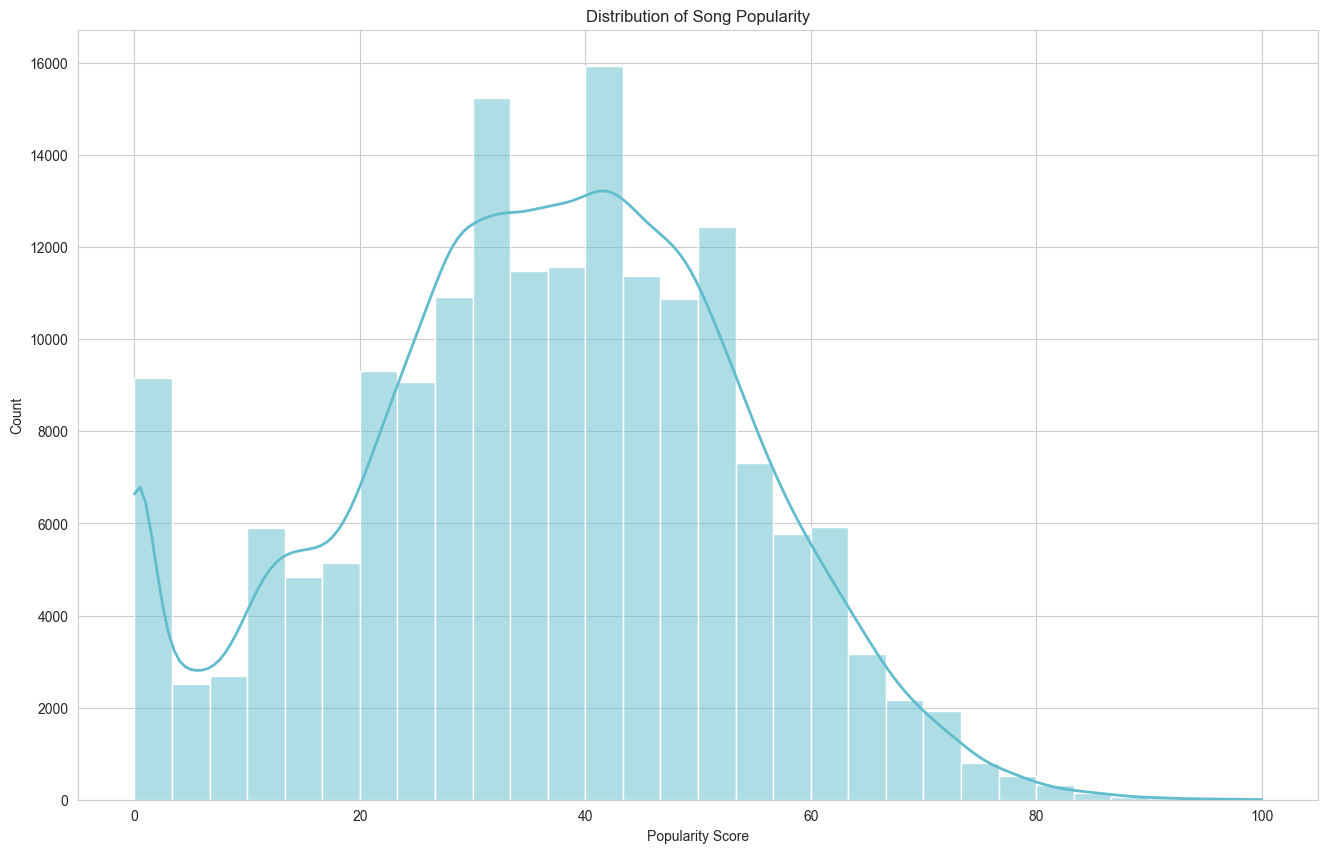

In [165]:
plt.figure(figsize = (16, 10))

sns.histplot(df['popularity'], bins=30, kde=True, color = sns.color_palette("GnBu", 6)[3], 
             line_kws={'color': sns.color_palette("GnBu", 6)[5], 'linewidth': 2})

plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

### **3.3 Feature Distribution**

The histograms below provide a visual overview of the underlying structure of the _Spotify Tracks Dataset._ These feature distributions reveal meaningful patterns in how musical attributes vary across tracks and offer important guidance for downstream preprocessing and model development. Several features exhibit wide variation, skewness, or multi-modal patterns, while others appear to be encoded categorical variables rather than true continuous measurements. Additionally, most continuous features exist on different scales, underscoring the necessity for normalization/ standarization of the dataset priort to modeling, as well as the assessing which columns could be dropped prior to modeling.



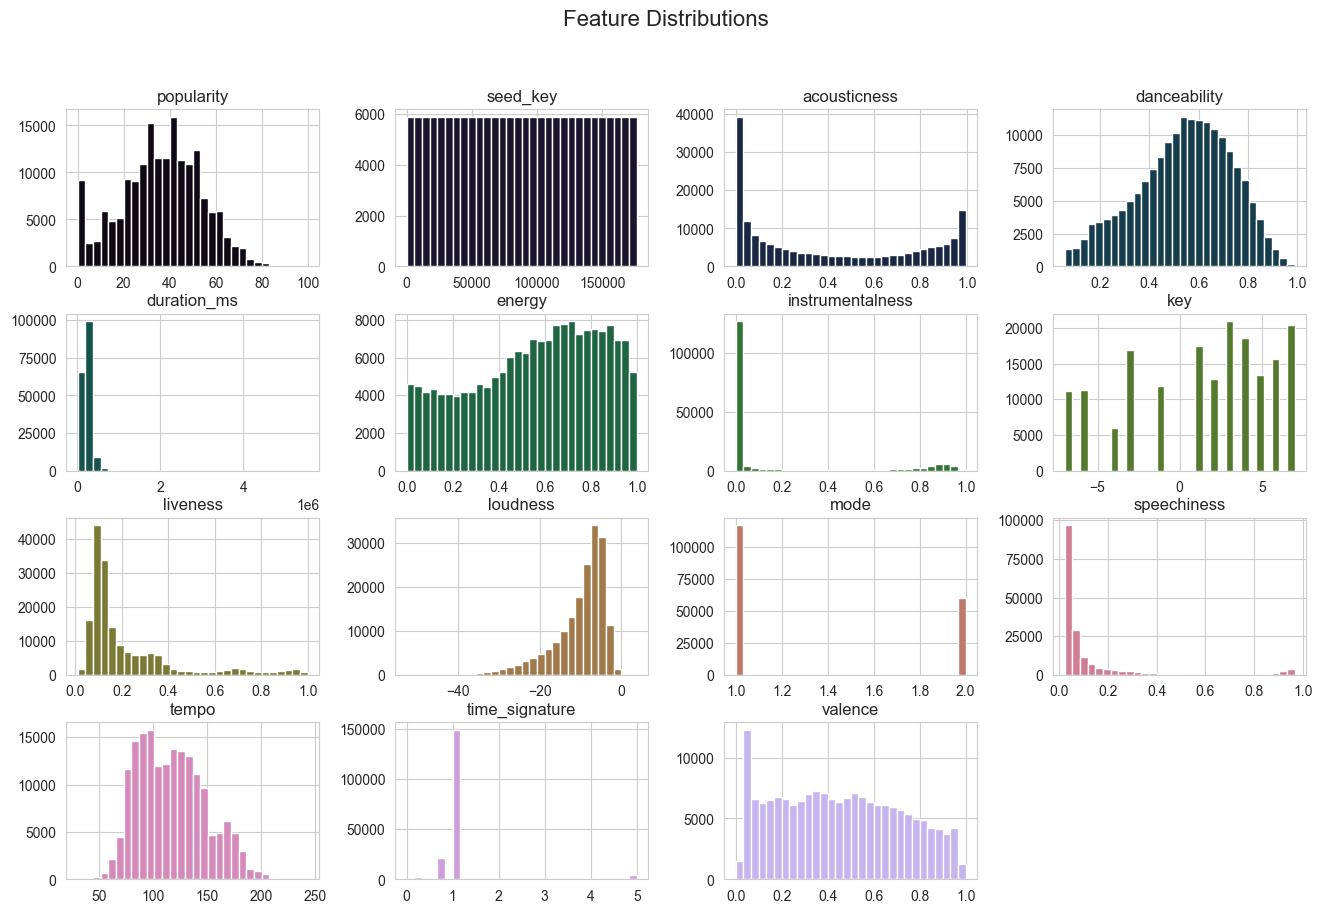

In [166]:
colors = sns.color_palette("cubehelix", len(df.columns))

axes = df.hist(figsize = (16, 10), bins = 30)

axes = axes.flatten()

for ax, color in zip(axes, colors):
    for patch in ax.patches:   # bars in the histogram
        patch.set_facecolor(color)

plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### **3.4 Correlation Matrix and Heatmap**

A correlation matrix was generated to examine the linear relationships between the numerical features in the dataset and identify which attributes may hold predictive value for modeling song popularity. The correlation structure of the dataset overall reveals generally weak to moderate relationship among most features, indicate that the dataset does not contain strong collinearity and many features contribute unique information.

With respect to the target variable (_**popularity**_), the correlations are relatively modest. Features attributed to audio qualities, such as danceability, energy, and valence show mild positive associations with popularity, suggesting more energetic and positive-sounding tracks tend to be more popular. Instrumentalness shows a negative correlation, indicating the purely instrumental music - regardless of genre - is typically less popular.

The correlation heatmap suggests that while no single feature strongly predicts popularity on its own, several audio attributes provide complementary information that can be combined to improve predictive performance.

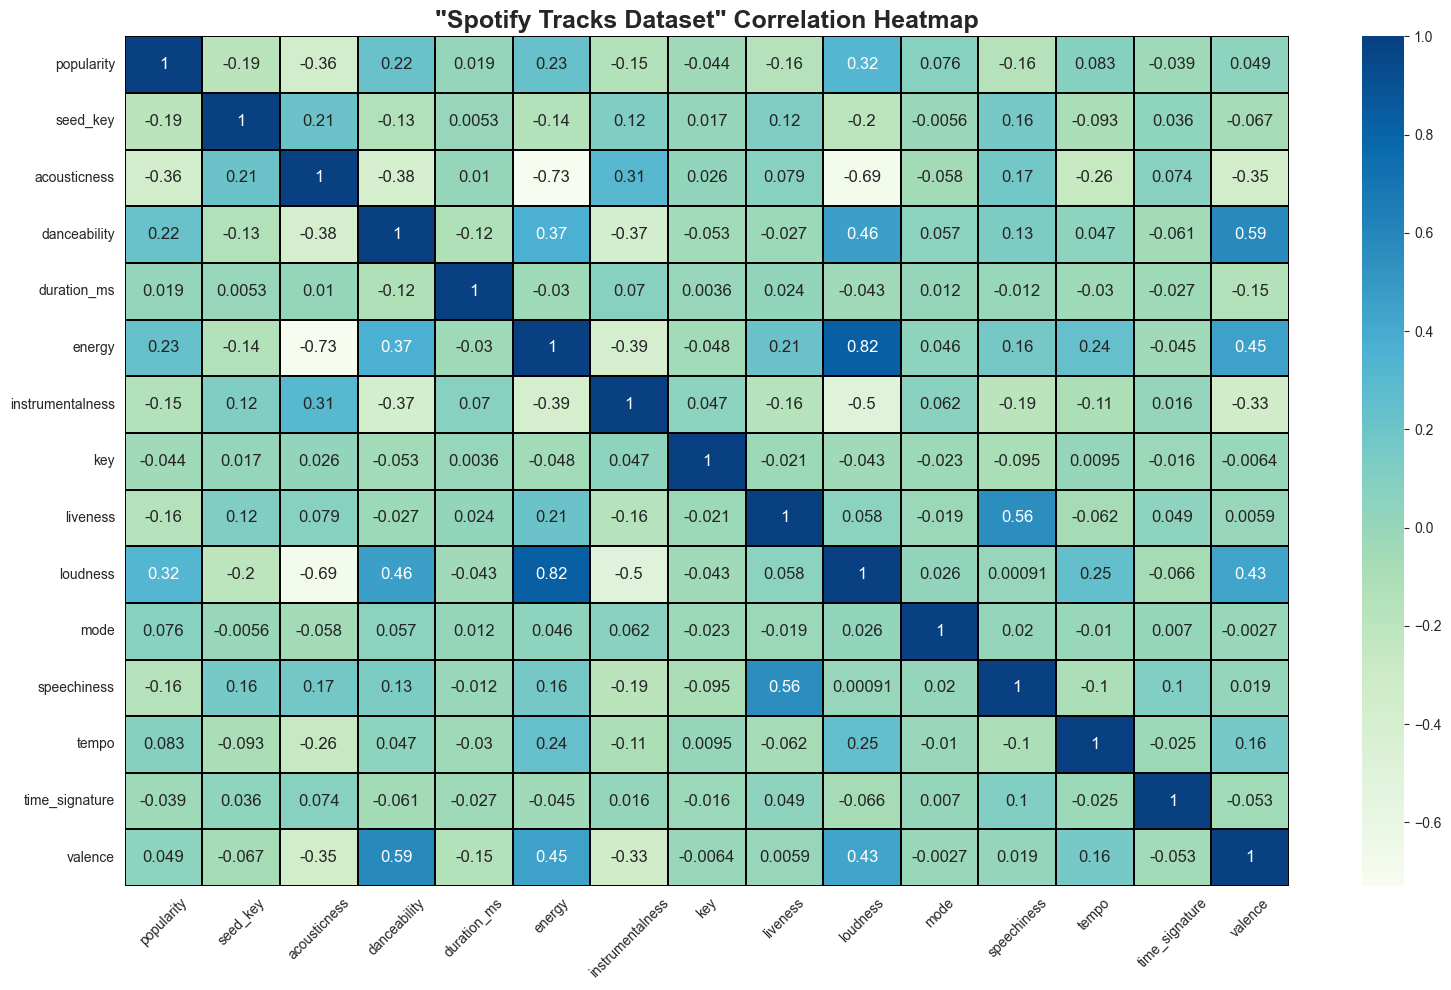

In [176]:
corr = df.select_dtypes(include = "number").corr()

fig, ax = plt.subplots(figsize = (16, 10))

sns.heatmap(corr,
            cmap = "GnBu",
            annot = True,
            annot_kws = {"size": 12},
            linewidths = 0.25,
            linecolor = "black",
            ax = ax)

ax.set_title('"Spotify Tracks Dataset" Correlation Heatmap', fontsize = 18, fontweight = "bold")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## **Section 4: Data Cleaning and Preprocessing**


### **4.1 Drop Unnecessary Columns**

Before continuing on with modeling for this data, it is important to remove columns that will not contribute meaningful information to the predicition task. The dataset contained several variables that were either non-numeric, high-cardinality, or strictly serving the purpose of an identifier within the dataset. These features do not contain interpretable signals for correlation analysis or supervised learning models. Removing these features reduces the risk of introducing "noise" to the model, in addition to unnessary dimensionality that could affect the performance of the model.

Specifically, the following columns were dropped:
- **track_id** and **seed_key**: Unique identifier for each track; no predictive value.
- **track_name** and **artist_name**: High-cardinality text features that do not directly encode musical characteristics.
- **genre**: Categorical feature with many distinct values and inconsistent labeling, which would require extensive cleaning or encoding without contributing to predictive power of the model.



In [116]:
df_clean = df.drop(columns=['track_id', 'seed_key', 'track_name', 'artist_name', 'genre'])
df_clean.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.509,0.766,15387,0.5380,0.000001,-1,0.131,-15.830,1,0.8800,92.912,0.00,0.000
1,0,0.969,0.562,15509,0.1250,0.001380,2,0.373,-15.449,2,0.2010,115.827,5.00,0.574
2,0,0.914,0.588,16316,0.1650,0.000000,4,0.233,-26.286,1,0.2370,104.678,1.00,0.000
3,18,0.922,0.422,16640,0.3210,0.000003,3,0.179,-15.381,1,0.3040,176.961,5.00,0.361
4,0,0.954,0.532,16748,0.0639,0.000000,-6,0.593,-25.800,1,0.0519,126.447,0.25,0.000


### **4.2 Train/Test Split**

To prepare the data for supervised learning, the cleaned dataset was separated into features (X) and the target variable (y), where _**popularity**_ serves as the response variable to be predicted. A standard 80/20 training-test split was applied to ensure that the model evaluation is performed on unseen data, allowing us to asses generalizability and minimize the potential for overfitting the model.

In [118]:
X = df_clean.drop('popularity', axis=1)
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


### **4.3 Scaling for Models that Require It**

Many machine learning algorithms (_linear regression and SVMs_) are sensitive to the scale of input features. Because the audio features in this dataset exist on different numerical ranges (_eg loudness is measured in decibles while tempo is measured in BPM_), scaling is necessary to ensure that no single feature disproportionaltely influences model training.

A Standard Scaler was applied to transform all features to have a mean of 0 and standard deviation of 1. The scaler was fit only to the training data and the same scaling parameters were applied to the test data. The scaled dataset will be applied to the Linear Regression and k-Nearest Neighbor models below. Tree-based models (Random Forest and Decision Tree models) do not require feature scaling.

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Section 5: Modeling**

### **5.1 Linear Regression**

The Linear Regression model establishes a baseline for performance. Although the model captures some linear relationships between audio features and popularity (_R^2 = 0.207_), its error rates are relatively high. These results suggest that popularity is influenced by nonlinear patterns or interactions that a simple linear model cannot fully capture. Subsequent models will explore more flexible learning approaches to determine whether predictive accuracy can be improved.

In [133]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error (RMSE):',lr_rmse)
print('Absolute Error Rate (MAE):', lr_mae)
print('R-Squared:', lr_r2)

Mean Squared Error (RMSE): 241.0269952173001
Absolute Error Rate (MAE): 12.38830359901313
R-Squared: 0.2065987018990234


### **5.2 k-Nearest Neighbor Regression**

k-Nearest Neighbor Regression model was trained on the scaled dataset, and several values of _k_ (_k = 3, 5, 10, 20_) were evaluated. The best/ most optimal performing model used _k=20_, smallest RMSE and MAE values, respectively at 214.65 and 11.43, and the largest R-squared of 0.293. Compared to the Linear Regression model baseline above, the kNN model reduced error and explained for more variance in song popularity. These results suggest that song popularity follows non-linear patterns that are better captured by a neighborhood-based approach, as opposed to a global linear model.


In [132]:
ks = [3, 5, 10, 20]
results_knn = {}

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results_knn[k] = (rmse, mae, r2)

results_knn


{3: (263.3343150303477, 12.59402108760702, 0.13316851835933663),
 5: (238.72758814034492, 12.000911845495994, 0.21416778169472872),
 10: (222.1360932234588, 11.62135191006145, 0.2687828823502605),
 20: (214.65097733129443, 11.42970718998669, 0.2934220339105468)}

In [134]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

knn_rmse = mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

print('Mean Squared Error (RMSE):',knn_rmse)
print('Absolute Error Rate (MAE):', knn_mae)
print('R-Squared:', knn_r2)


Mean Squared Error (RMSE): 222.1360932234588
Absolute Error Rate (MAE): 11.62135191006145
R-Squared: 0.2687828823502605


### **5.3 Decision Tree Regressor**

A Decision Tree Regressor was trained using several values of max_depth to control model complexity. Depths of 3, 5, 10, and 20 were evaluated, with max_depth = 10 providing the best balance between underfitting and overfitting. This configuration achieved an RMSE = 218.31, MAE = 11.46, and R-squared = .281, outperforming the Linear Regression baseline and performing comparably to the tuned kNN model.

Feature importance analysis showed that variables such as loudness, energy, danceability, and acousticness contributed most strongly to predicting _**popularity**_. These findings highlight that non-linear splits capture meaningful structure in the dataset, but deeper trees risk overfitting without substantial performance gains.


In [135]:
depths = [3, 5, 10, 20]
results_dt = {}

for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_dt[d] = (rmse, mae, r2)

results_dt


{3: (245.18138096380815, 12.42080246356696, 0.19292349078368742),
 5: (230.66801646880268, 11.949694149060592, 0.24069789970318867),
 10: (218.21497636206226, 11.460021769485913, 0.2816902299485362),
 20: (323.7682853636363, 13.563342571543258, -0.06576517563871032)}

In [136]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print('Mean Squared Error (RMSE):',dt_rmse)
print('Absolute Error Rate (MAE):', dt_mae)
print('R-Squared:', dt_r2)


Mean Squared Error (RMSE): 218.402319387846
Absolute Error Rate (MAE): 11.462889815122026
R-Squared: 0.2810735430097434


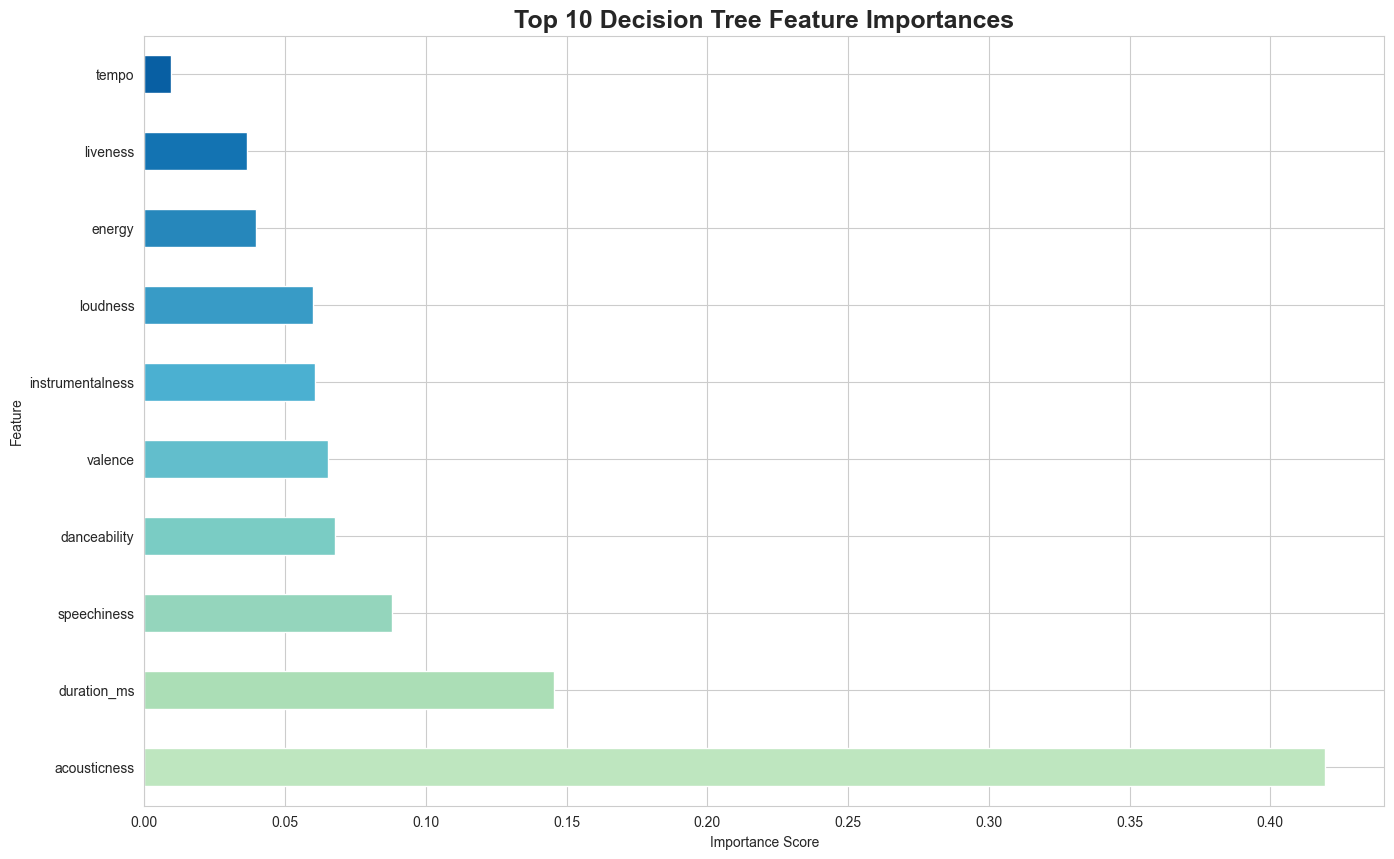

In [177]:
feature_importances = pd.Series(
    dt.feature_importances_,
    index = X_train.columns
).sort_values(ascending = False)

vals = feature_importances.head(10)

feature_importances.head(10).plot(kind = 'barh', figsize = (16, 10), color = plt.cm.GnBu(np.linspace(0.3, 0.9, len(vals))))
plt.title("Top 10 Decision Tree Feature Importances", fontsize = 18, fontweight = "bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## **Section 6: Results and Evaluation**

### **6.1 Present evaluation metrics**

To evaluate model performance, three regression metrics were calculated for each algorithm:

- Root Mean Squared Error (RMSE): Standardized way of measuring prediction error rate to the error rate of the target variable; minimize,
- Mean Absolute Error (MAE): Reflects "magnitude" of errors; minimize,
- R-squared: Captures how much variation in the target variable the model explains; maximize.
  
The results for the three models are summarized below. Overall, the Decision Tree model performed best across all three metrics with the lowest RMSE and MAE, and the highest R-squared score; however, all three model results presented a similar R-squared score (between 0.207 - 0.281), suggesting that while the features explain some variance in _**popularity**_, much of the variation remains unaccounted for. This is consistent with real-world expectations of music in that we know song popularity is influenced by many factors not represented in this dataset.


In [141]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN', 'Decision Tree',],
    'RMSE': [lr_rmse, knn_rmse, dt_rmse],
    'MAE': [lr_mae, knn_mae, dt_mae],
    'R2': [lr_r2, knn_r2, dt_r2]
})

results


,Model,RMSE,MAE,R2
0,Linear Regression,241.026995,12.388304,0.206599
1,kNN,222.136093,11.621352,0.268783
2,Decision Tree,218.402319,11.462890,0.281074


### **6.2 Performance Bar Chart**

To visually compare model performance, a bar chart was generated to display the R-squared scores for each model trained. R-squared measures the proportion of variance in song **_popularity_** explained by each model, with high values inidicating better predictive power.

While the Decision Tree performed best, the overall R-squared values (0.20 - 0.28) indicate that only a modest proportion of **_popularity_** variance is explained by the features in the _Spotify Tracks Dataset_.


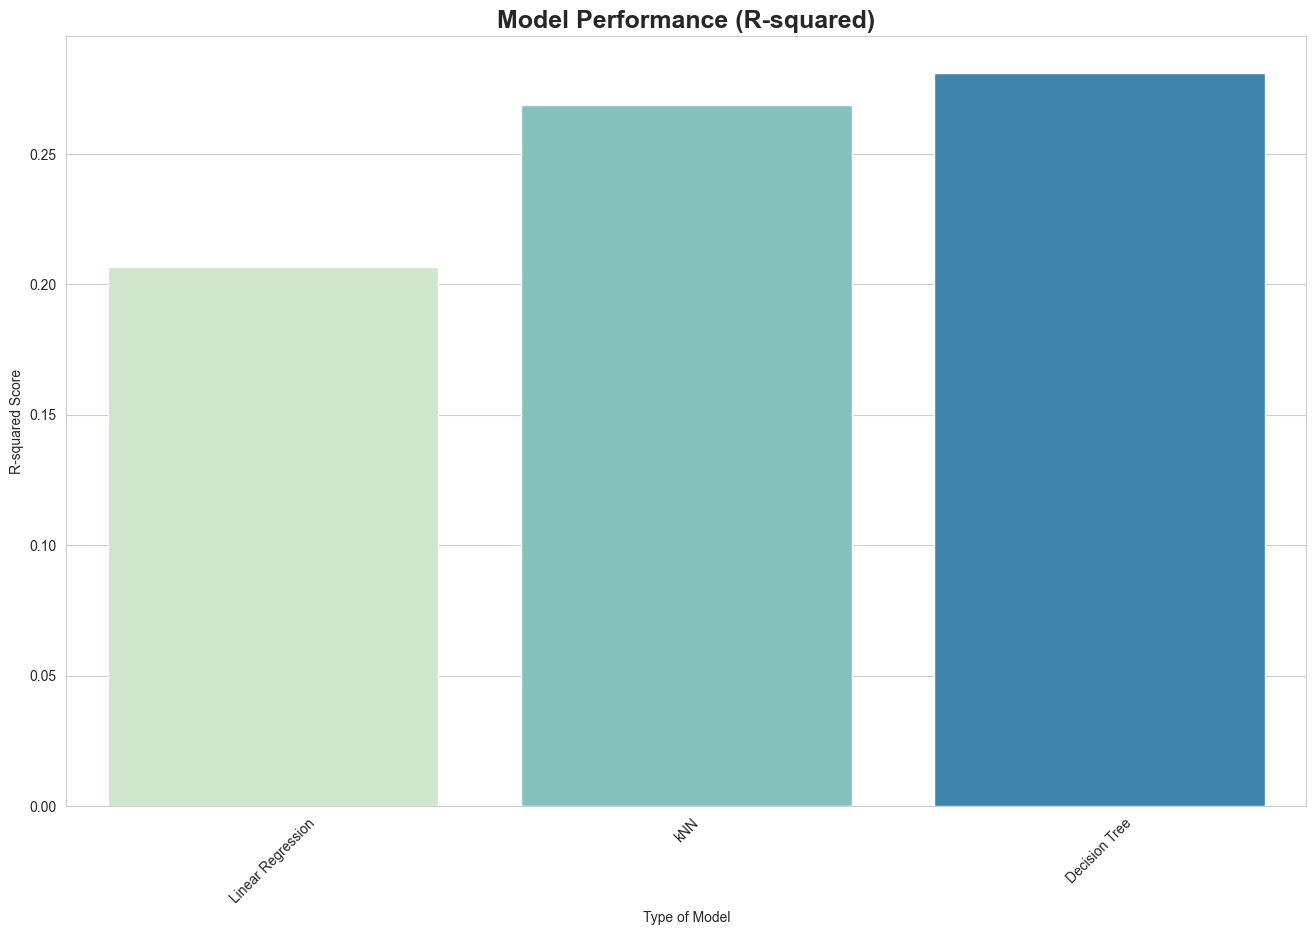

In [186]:
plt.figure(figsize = (16, 10))

sns.barplot(data = results, x = 'Model', y = 'R2', palette=sns.color_palette("GnBu", len(results)))
plt.xticks(rotation = 45)

plt.title("Model Performance (R-squared)", fontsize = 18, fontweight = "bold")
plt.xlabel("Type of Model")
plt.ylabel("R-squared Score")

plt.show()


#**Section 7: Conclusion**

### **7.1 Summary of findings**


Among the models tested, the Decision Tree achieved the best overall performance, producing the lowest error values (RMSE and MAE) and the highest R-squared score. This suggests that the relationships between audio features and **_popularity_** are at least partially non-linear, which tree-based models can capture more effectively than Linear Regression or kNN.

Across models, features _energy, loudness, acousticness, danceability, and tempo_ appeared the most influential in predicting **_popularity_**. These attributes align with characteristics that typically shape listener engagement and commercial appeal. The results indicate that audio features offer some predictive power in the _Spotify Tracks Dataset_, but they explain only a small portion of the variability in the song **_popularity_**. External factors (marketing, artist visibility, playlist placement, cultural trends, etc) likely play a larger role and are not presented in this dataset.

This study is also limited by the scope of available features, the absence of temporal or genre context, and inherently dynamic nature of **_popularity_** metrics. Future work incorporating richer metadata and additional model types could improve predicitive accuracy.

### **7.2 Future work**

There are several opportunities to extend and strengthen this analysis. First, using a larger and more diverse dataset would provide broader representation across genres, eras, and listening patterns, improving the generalizability of the models. Incorporating additional contextual features such as artist_popularity, release_date, playlist_placement, or artist_social_media_engagement could also aid in capturing external influences that heavily shape a song's _**popularity**_.

Future iterations of this project could also explore a wider range of models and tuning. Testing additional algorithms such as Random Forests, Boosting, or Support Vector Regression may reveal more complex relationship and improve predicitive accuracy, as the Decision Tree did in this project. Hyperparameter tuning and more rigorous cross-validation could further refine performance of each model.